In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-image/1_xZl-w1g3yDNiPVP5JHPlFA.webp
/kaggle/input/colour-image-text/1_Gs6ic7I5WvfJGPlnYfo3nw.webp


The extraction of text with pytesseract needs a library to be installed in the system environment. The below commands will help the installation of libraries in your system.

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


# Extracting text from a grayscale image

In [4]:
from PIL import Image
from pytesseract import pytesseract

In [5]:
image = Image.open('/kaggle/input/text-image/1_xZl-w1g3yDNiPVP5JHPlFA.webp')
image = image.resize((400,200))
image.save('sample.png')

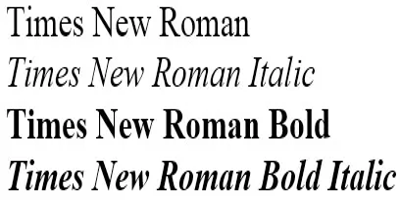

In [6]:
image

from IPython.display import Image


In [7]:
text = pytesseract.image_to_string(image)
#print the text line by line
print(text[:-1])

Times New Roman

Times New Roman Italic
Times New Roman Bold
Times New Roman Bold Italic



# Detecting and Extracting text from color image

In this example, we will use OpenCV also to use the bounding box and other methods for OpenCV.

Install the libraries for this example

In [8]:
import cv2
from pytesseract import pytesseract

In [9]:
image = Image.open("/kaggle/input/colour-image-text/1_Gs6ic7I5WvfJGPlnYfo3nw.webp")
image = image.resize((400,200))
image.save('sample1.png')

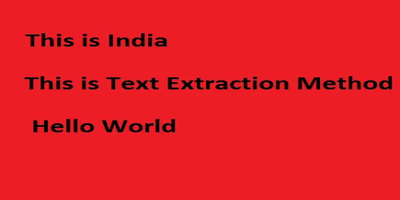

In [10]:
image

Reading the image with the help of OpenCV method.

In [11]:
img = cv2.imread("/kaggle/input/colour-image-text/1_Gs6ic7I5WvfJGPlnYfo3nw.webp")

Converting the color image to grayscale image for better text processing.

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Now, we will convert the grayscale image to binary image to enhance the chance of text extracting.
Here, imwrite method is used to save the image in the working directory.

In [13]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
cv2.imwrite('threshold_image.jpg',thresh1)

True

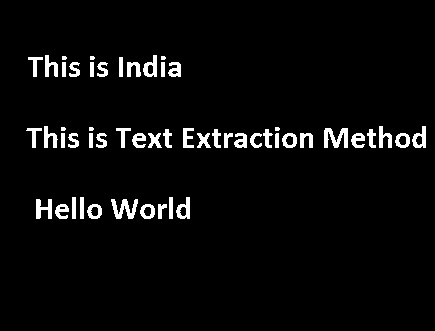

In [14]:
image = Image.open("/kaggle/working/threshold_image.jpg")
image

In [15]:
text = pytesseract.image_to_string(image)
#print the text line by line
print(text[:-1])

This is India

This is Text Extraction Method

Hello World



To get the size of the sentences or even a word from the image, we need a structure element method in OpenCV with the kernel size depending upon the area of the text.

In [16]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))

The next step is to use the dilation method on the binary image to get the boundaries of the text.

In [17]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 3)
cv2.imwrite('dilation_image.jpg',dilation)

True

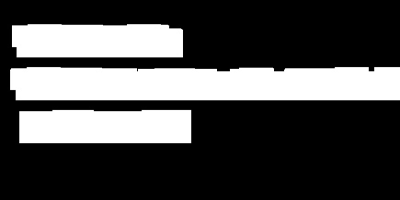

In [18]:
image = Image.open("/kaggle/working/dilation_image.jpg")
image = image.resize((400,200))
image

We can increase the iteration number, depending on the foreground pixels i.e. white pixels to get the proper shape of the bounding box.

Now, we will use the find contour method to get the area of the white pixels.

In [19]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                            cv2.CHAIN_APPROX_NONE)

In [20]:
im2 = img.copy()

Now, it’s time to get the magic to happen on the image. Here we will get the coordinates of the white pixel area and draw the bounding box around it. We will also save the text from the image in the text file.

In [21]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Draw the bounding box on the text area
    rect=cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Crop the bounding box area
    cropped = im2[y:y + h, x:x + w]
    
    cv2.imwrite('rectanglebox.jpg',rect)
     
    # open the text file
    file = open("text_output2.txt", "a")
     
    # Using tesseract on the cropped image area to get text
    text = pytesseract.image_to_string(cropped)
     
    # Adding the text to the file
    file.write(text)
    file.write("\n")
     
    # Closing the file
    file.close

In [22]:
text

' \n\n \n\nThis is India\n\n \n\n \n\x0c'

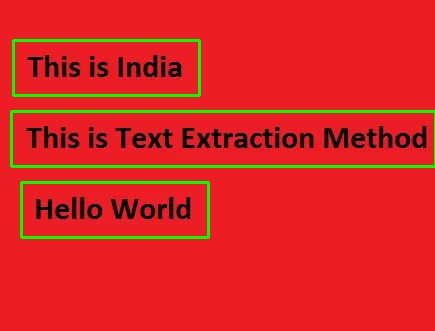

In [23]:
image = Image.open("/kaggle/working/rectanglebox.jpg")
image

In [24]:
myfile = open("/kaggle/working/text_output2.txt")
myfile

<_io.TextIOWrapper name='/kaggle/working/text_output2.txt' mode='r' encoding='UTF-8'>

In [25]:
# Readlines returns a list of the lines in the file
myfile.seek(0)
myfile.readlines()

[' \n',
 '\n',
 ' \n',
 '\n',
 'Hello World\n',
 '\n',
 ' \n',
 '\n',
 ' \n',
 '\x0c\n',
 ' \n',
 '\n',
 ' \n',
 '\n',
 'This is Text Extraction Method\n',
 '\n',
 ' \n',
 '\n',
 ' \n',
 '\x0c\n']

In [26]:
crop_number=0 
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Draw the bounding box on the text area
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Crop the bounding box area
    cropped = im2[y:y + h, x:x + w]
    
    cv2.imwrite("crop"+str(crop_number)+".jpeg",cropped)
    crop_number+=1
    
    cv2.imwrite('rectanglebox.jpg',rect)
     
    # open the text file
    file = open("text_output2.txt", "a")
     
    # Using tesseract on the cropped image area to get text
    text = pytesseract.image_to_string(cropped)
     
    # Adding the text to the file
    file.write(text)
    file.write("\n")
     
    # Closing the file
    file.close

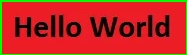

In [27]:
image1 = Image.open("/kaggle/working/crop0.jpeg")
image2 = Image.open("/kaggle/working/crop1.jpeg")
image3 = Image.open("/kaggle/working/crop2.jpeg")
image1


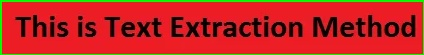

In [28]:
image2

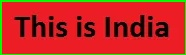

In [29]:
image3